# Анализ оценки уровня счастья в разных странах за 8 лет 

## Задачи

Провести исследовательский анализ данных об уровне счастья в разных странах
и ответить на следующие вопросы:
</br>Топ 10 самых счастливых стран за каждый год с 2015-2022?
</br>Какой фактор оказывает наибольшее влияние на счастье в 2019 году? 
</br>Какой фактор оказывает наименьшее влияние на счастье в 2019 году? 
</br>В целом счастье увеличивается или уменьшается с 2015- 2022 год?

## Данные

Данные взяты с kaggle за [2015-2019](https://www.kaggle.com/datasets/unsdsn/world-happiness) и [2020-2022](https://www.kaggle.com/datasets/mathurinache/world-happiness-report?select=2022.csv)

- `Overall rank` - рейтинг страны по уровню счастья.
- `Country or region` - страна.
- `Score` - средняя оценка уровня счастья по стране (метрика, измеренная путем задания участникам выборки вопроса: «Как бы вы оценили свое счастье по шкале от 0 до 10, где 10 — это наивысшее счастье»).
- `GDP per capita` - степень, в которой ВВП влияет на расчет показателя счастья.
- `Social support` - степень, в которой уровень поддержки способствует расчету показателя счастья.
- `Healthy life expectancy` - степень, в которой ожидаемая продолжительность жизни способствовала расчету показателя счастья.
- `Freedom to make life choices` - степень, в которой свобода способствовала расчету показателя счастья.
- `Generosity` - степень, в которой уровень щедрости влияет на показатель счастья.
- `Perceptions of corruption` - степень, в которой уровень восприятия коррупции влияет на показатель счастья.


## Изучение данных 

In [1]:
#Импорт библиотек 
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt

In [2]:
# чтение файлов
happiness_2022 = pd.read_csv('2022.csv')
happiness_2021 = pd.read_csv('2021.csv')
happiness_2020 = pd.read_csv('2020.csv')
happiness_2019 = pd.read_csv('2019.csv')
happiness_2018 = pd.read_csv('2018.csv')
happiness_2017 = pd.read_csv('2017.csv')
happiness_2016 = pd.read_csv('2016.csv')
happiness_2015 = pd.read_csv('2015.csv')

In [3]:
#вывод данных  
happiness_2022.head()

,RANK,Country,Happiness score,Whisker-high,Whisker-low,Dystopia (1.83) + residual,Explained by: GDP per capita,Explained by: Social support,Explained by: Healthy life expectancy,Explained by: Freedom to make life choices,Explained by: Generosity,Explained by: Perceptions of corruption
0,1,Finland,"7,821","7,886","7,756","2,518","1,892","1,258","0,775","0,736","0,109","0,534"
1,2,Denmark,"7,636","7,710","7,563","2,226","1,953","1,243","0,777","0,719","0,188","0,532"
2,3,Iceland,"7,557","7,651","7,464","2,320","1,936","1,320","0,803","0,718","0,270","0,191"
3,4,Switzerland,"7,512","7,586","7,437","2,153","2,026","1,226","0,822","0,677","0,147","0,461"
4,5,Netherlands,"7,415","7,471","7,359","2,137","1,945","1,206","0,787","0,651","0,271","0,419"


In [4]:
# вывод информации по таблице
happiness_2022.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 147 entries, 0 to 146
Data columns (total 12 columns):
 #   Column                                      Non-Null Count  Dtype 
---  ------                                      --------------  ----- 
 0   RANK                                        147 non-null    int64 
 1   Country                                     147 non-null    object
 2   Happiness score                             146 non-null    object
 3   Whisker-high                                146 non-null    object
 4   Whisker-low                                 146 non-null    object
 5   Dystopia (1.83) + residual                  146 non-null    object
 6   Explained by: GDP per capita                146 non-null    object
 7   Explained by: Social support                146 non-null    object
 8   Explained by: Healthy life expectancy       146 non-null    object
 9   Explained by: Freedom to make life choices  146 non-null    object
 10  Explained by: Generosity  

In [5]:
happiness_2021.head()

,Country name,Regional indicator,Ladder score,Standard error of ladder score,upperwhisker,lowerwhisker,Logged GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption,Ladder score in Dystopia,Explained by: Log GDP per capita,Explained by: Social support,Explained by: Healthy life expectancy,Explained by: Freedom to make life choices,Explained by: Generosity,Explained by: Perceptions of corruption,Dystopia + residual
0,Finland,Western Europe,7.842,0.032,7.904,7.780,10.775,0.954,72.0,0.949,-0.098,0.186,2.43,1.446,1.106,0.741,0.691,0.124,0.481,3.253
1,Denmark,Western Europe,7.620,0.035,7.687,7.552,10.933,0.954,72.7,0.946,0.030,0.179,2.43,1.502,1.108,0.763,0.686,0.208,0.485,2.868
2,Switzerland,Western Europe,7.571,0.036,7.643,7.500,11.117,0.942,74.4,0.919,0.025,0.292,2.43,1.566,1.079,0.816,0.653,0.204,0.413,2.839
3,Iceland,Western Europe,7.554,0.059,7.670,7.438,10.878,0.983,73.0,0.955,0.160,0.673,2.43,1.482,1.172,0.772,0.698,0.293,0.170,2.967
4,Netherlands,Western Europe,7.464,0.027,7.518,7.410,10.932,0.942,72.4,0.913,0.175,0.338,2.43,1.501,1.079,0.753,0.647,0.302,0.384,2.798


In [6]:
happiness_2021.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 149 entries, 0 to 148
Data columns (total 20 columns):
 #   Column                                      Non-Null Count  Dtype  
---  ------                                      --------------  -----  
 0   Country name                                149 non-null    object 
 1   Regional indicator                          149 non-null    object 
 2   Ladder score                                149 non-null    float64
 3   Standard error of ladder score              149 non-null    float64
 4   upperwhisker                                149 non-null    float64
 5   lowerwhisker                                149 non-null    float64
 6   Logged GDP per capita                       149 non-null    float64
 7   Social support                              149 non-null    float64
 8   Healthy life expectancy                     149 non-null    float64
 9   Freedom to make life choices                149 non-null    float64
 10  Generosity    

In [7]:
happiness_2020.head()

,Country name,Regional indicator,Ladder score,Standard error of ladder score,upperwhisker,lowerwhisker,Logged GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption,Ladder score in Dystopia,Explained by: Log GDP per capita,Explained by: Social support,Explained by: Healthy life expectancy,Explained by: Freedom to make life choices,Explained by: Generosity,Explained by: Perceptions of corruption,Dystopia + residual
0,Finland,Western Europe,7.8087,0.031156,7.869766,7.747634,10.639267,0.954330,71.900825,0.949172,-0.059482,0.195445,1.972317,1.285190,1.499526,0.961271,0.662317,0.159670,0.477857,2.762835
1,Denmark,Western Europe,7.6456,0.033492,7.711245,7.579955,10.774001,0.955991,72.402504,0.951444,0.066202,0.168489,1.972317,1.326949,1.503449,0.979333,0.665040,0.242793,0.495260,2.432741
2,Switzerland,Western Europe,7.5599,0.035014,7.628528,7.491272,10.979933,0.942847,74.102448,0.921337,0.105911,0.303728,1.972317,1.390774,1.472403,1.040533,0.628954,0.269056,0.407946,2.350267
3,Iceland,Western Europe,7.5045,0.059616,7.621347,7.387653,10.772559,0.974670,73.000000,0.948892,0.246944,0.711710,1.972317,1.326502,1.547567,1.000843,0.661981,0.362330,0.144541,2.460688
4,Norway,Western Europe,7.4880,0.034837,7.556281,7.419719,11.087804,0.952487,73.200783,0.955750,0.134533,0.263218,1.972317,1.424207,1.495173,1.008072,0.670201,0.287985,0.434101,2.168266


In [8]:
happiness_2020.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 153 entries, 0 to 152
Data columns (total 20 columns):
 #   Column                                      Non-Null Count  Dtype  
---  ------                                      --------------  -----  
 0   Country name                                153 non-null    object 
 1   Regional indicator                          153 non-null    object 
 2   Ladder score                                153 non-null    float64
 3   Standard error of ladder score              153 non-null    float64
 4   upperwhisker                                153 non-null    float64
 5   lowerwhisker                                153 non-null    float64
 6   Logged GDP per capita                       153 non-null    float64
 7   Social support                              153 non-null    float64
 8   Healthy life expectancy                     153 non-null    float64
 9   Freedom to make life choices                153 non-null    float64
 10  Generosity    

In [9]:
happiness_2019.head()

,Overall rank,Country or region,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
0,1,Finland,7.769,1.340,1.587,0.986,0.596,0.153,0.393
1,2,Denmark,7.600,1.383,1.573,0.996,0.592,0.252,0.410
2,3,Norway,7.554,1.488,1.582,1.028,0.603,0.271,0.341
3,4,Iceland,7.494,1.380,1.624,1.026,0.591,0.354,0.118
4,5,Netherlands,7.488,1.396,1.522,0.999,0.557,0.322,0.298


In [10]:
happiness_2019.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 156 entries, 0 to 155
Data columns (total 9 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Overall rank                  156 non-null    int64  
 1   Country or region             156 non-null    object 
 2   Score                         156 non-null    float64
 3   GDP per capita                156 non-null    float64
 4   Social support                156 non-null    float64
 5   Healthy life expectancy       156 non-null    float64
 6   Freedom to make life choices  156 non-null    float64
 7   Generosity                    156 non-null    float64
 8   Perceptions of corruption     156 non-null    float64
dtypes: float64(7), int64(1), object(1)
memory usage: 11.1+ KB


In [11]:
happiness_2018.head()

,Overall rank,Country or region,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
0,1,Finland,7.632,1.305,1.592,0.874,0.681,0.202,0.393
1,2,Norway,7.594,1.456,1.582,0.861,0.686,0.286,0.340
2,3,Denmark,7.555,1.351,1.590,0.868,0.683,0.284,0.408
3,4,Iceland,7.495,1.343,1.644,0.914,0.677,0.353,0.138
4,5,Switzerland,7.487,1.420,1.549,0.927,0.660,0.256,0.357


In [12]:
happiness_2018.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 156 entries, 0 to 155
Data columns (total 9 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Overall rank                  156 non-null    int64  
 1   Country or region             156 non-null    object 
 2   Score                         156 non-null    float64
 3   GDP per capita                156 non-null    float64
 4   Social support                156 non-null    float64
 5   Healthy life expectancy       156 non-null    float64
 6   Freedom to make life choices  156 non-null    float64
 7   Generosity                    156 non-null    float64
 8   Perceptions of corruption     155 non-null    float64
dtypes: float64(7), int64(1), object(1)
memory usage: 11.1+ KB


In [13]:
happiness_2017.head()

,Country,Happiness.Rank,Happiness.Score,Whisker.high,Whisker.low,Economy..GDP.per.Capita.,Family,Health..Life.Expectancy.,Freedom,Generosity,Trust..Government.Corruption.,Dystopia.Residual
0,Norway,1,7.537,7.594445,7.479556,1.616463,1.533524,0.796667,0.635423,0.362012,0.315964,2.277027
1,Denmark,2,7.522,7.581728,7.462272,1.482383,1.551122,0.792566,0.626007,0.355280,0.400770,2.313707
2,Iceland,3,7.504,7.622030,7.385970,1.480633,1.610574,0.833552,0.627163,0.475540,0.153527,2.322715
3,Switzerland,4,7.494,7.561772,7.426227,1.564980,1.516912,0.858131,0.620071,0.290549,0.367007,2.276716
4,Finland,5,7.469,7.527542,7.410458,1.443572,1.540247,0.809158,0.617951,0.245483,0.382612,2.430182


In [14]:
happiness_2017.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 155 entries, 0 to 154
Data columns (total 12 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Country                        155 non-null    object 
 1   Happiness.Rank                 155 non-null    int64  
 2   Happiness.Score                155 non-null    float64
 3   Whisker.high                   155 non-null    float64
 4   Whisker.low                    155 non-null    float64
 5   Economy..GDP.per.Capita.       155 non-null    float64
 6   Family                         155 non-null    float64
 7   Health..Life.Expectancy.       155 non-null    float64
 8   Freedom                        155 non-null    float64
 9   Generosity                     155 non-null    float64
 10  Trust..Government.Corruption.  155 non-null    float64
 11  Dystopia.Residual              155 non-null    float64
dtypes: float64(10), int64(1), object(1)
memory usage: 

In [15]:
happiness_2016.head()

,Country,Region,Happiness Rank,Happiness Score,Lower Confidence Interval,Upper Confidence Interval,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,Denmark,Western Europe,1,7.526,7.460,7.592,1.44178,1.16374,0.79504,0.57941,0.44453,0.36171,2.73939
1,Switzerland,Western Europe,2,7.509,7.428,7.590,1.52733,1.14524,0.86303,0.58557,0.41203,0.28083,2.69463
2,Iceland,Western Europe,3,7.501,7.333,7.669,1.42666,1.18326,0.86733,0.56624,0.14975,0.47678,2.83137
3,Norway,Western Europe,4,7.498,7.421,7.575,1.57744,1.12690,0.79579,0.59609,0.35776,0.37895,2.66465
4,Finland,Western Europe,5,7.413,7.351,7.475,1.40598,1.13464,0.81091,0.57104,0.41004,0.25492,2.82596


In [16]:
happiness_2016.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 157 entries, 0 to 156
Data columns (total 13 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Country                        157 non-null    object 
 1   Region                         157 non-null    object 
 2   Happiness Rank                 157 non-null    int64  
 3   Happiness Score                157 non-null    float64
 4   Lower Confidence Interval      157 non-null    float64
 5   Upper Confidence Interval      157 non-null    float64
 6   Economy (GDP per Capita)       157 non-null    float64
 7   Family                         157 non-null    float64
 8   Health (Life Expectancy)       157 non-null    float64
 9   Freedom                        157 non-null    float64
 10  Trust (Government Corruption)  157 non-null    float64
 11  Generosity                     157 non-null    float64
 12  Dystopia Residual              157 non-null    flo

In [17]:
happiness_2015.head()

,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,Switzerland,Western Europe,1,7.587,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738
1,Iceland,Western Europe,2,7.561,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201
2,Denmark,Western Europe,3,7.527,0.03328,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204
3,Norway,Western Europe,4,7.522,0.03880,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531
4,Canada,North America,5,7.427,0.03553,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176


In [18]:
happiness_2015.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 158 entries, 0 to 157
Data columns (total 12 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Country                        158 non-null    object 
 1   Region                         158 non-null    object 
 2   Happiness Rank                 158 non-null    int64  
 3   Happiness Score                158 non-null    float64
 4   Standard Error                 158 non-null    float64
 5   Economy (GDP per Capita)       158 non-null    float64
 6   Family                         158 non-null    float64
 7   Health (Life Expectancy)       158 non-null    float64
 8   Freedom                        158 non-null    float64
 9   Trust (Government Corruption)  158 non-null    float64
 10  Generosity                     158 non-null    float64
 11  Dystopia Residual              158 non-null    float64
dtypes: float64(9), int64(1), object(2)
memory usage: 1

In [19]:
# вывод количества дубликатов в каждом фрейме
print(happiness_2022.duplicated().sum())
print(happiness_2021.duplicated().sum())
print(happiness_2020.duplicated().sum())
print(happiness_2019.duplicated().sum())
print(happiness_2018.duplicated().sum())
print(happiness_2017.duplicated().sum())
print(happiness_2016.duplicated().sum())
print(happiness_2015.duplicated().sum())

0
0
0
0
0
0
0
0


In [20]:
# вывод кол-ва пропущенных записей в столбцах фрейма 'happiness_2022'
happiness_2022.isnull().sum()

RANK                                          0
Country                                       0
Happiness score                               1
Whisker-high                                  1
Whisker-low                                   1
Dystopia (1.83) + residual                    1
Explained by: GDP per capita                  1
Explained by: Social support                  1
Explained by: Healthy life expectancy         1
Explained by: Freedom to make life choices    1
Explained by: Generosity                      1
Explained by: Perceptions of corruption       1
dtype: int64

In [21]:
# вывод пропущенных данных в процентах по столбцам
(happiness_2022.isnull().mean())*100

RANK                                          0.000000
Country                                       0.000000
Happiness score                               0.680272
Whisker-high                                  0.680272
Whisker-low                                   0.680272
Dystopia (1.83) + residual                    0.680272
Explained by: GDP per capita                  0.680272
Explained by: Social support                  0.680272
Explained by: Healthy life expectancy         0.680272
Explained by: Freedom to make life choices    0.680272
Explained by: Generosity                      0.680272
Explained by: Perceptions of corruption       0.680272
dtype: float64

In [22]:
# вывод пропущенных данных по строкам
happiness_2022.isnull().sum(axis=1)

0       0
1       0
2       0
3       0
4       0
       ..
142     0
143     0
144     0
145     0
146    10
Length: 147, dtype: int64

In [23]:
# вывод пропущенных данных в процентах по строкам
(happiness_2022.isnull().mean(axis=1))*100

0       0.000000
1       0.000000
2       0.000000
3       0.000000
4       0.000000
         ...    
142     0.000000
143     0.000000
144     0.000000
145     0.000000
146    83.333333
Length: 147, dtype: float64

In [24]:
# вывод кол-ва пропущенных записей в столбцах фрейма 'happiness_2021'
happiness_2021.isnull().sum()

Country name                                  0
Regional indicator                            0
Ladder score                                  0
Standard error of ladder score                0
upperwhisker                                  0
lowerwhisker                                  0
Logged GDP per capita                         0
Social support                                0
Healthy life expectancy                       0
Freedom to make life choices                  0
Generosity                                    0
Perceptions of corruption                     0
Ladder score in Dystopia                      0
Explained by: Log GDP per capita              0
Explained by: Social support                  0
Explained by: Healthy life expectancy         0
Explained by: Freedom to make life choices    0
Explained by: Generosity                      0
Explained by: Perceptions of corruption       0
Dystopia + residual                           0
dtype: int64

In [25]:
# вывод кол-ва пропущенных записей в столбцах фрейма 'happiness_2020'
happiness_2020.isnull().sum()

Country name                                  0
Regional indicator                            0
Ladder score                                  0
Standard error of ladder score                0
upperwhisker                                  0
lowerwhisker                                  0
Logged GDP per capita                         0
Social support                                0
Healthy life expectancy                       0
Freedom to make life choices                  0
Generosity                                    0
Perceptions of corruption                     0
Ladder score in Dystopia                      0
Explained by: Log GDP per capita              0
Explained by: Social support                  0
Explained by: Healthy life expectancy         0
Explained by: Freedom to make life choices    0
Explained by: Generosity                      0
Explained by: Perceptions of corruption       0
Dystopia + residual                           0
dtype: int64

In [26]:
# вывод кол-ва пропущенных записей в столбцах фрейма 'happiness_2019'
happiness_2019.isnull().sum() 

Overall rank                    0
Country or region               0
Score                           0
GDP per capita                  0
Social support                  0
Healthy life expectancy         0
Freedom to make life choices    0
Generosity                      0
Perceptions of corruption       0
dtype: int64

In [27]:
# вывод кол-ва пропущенных записей в столбцах фрейма 'happiness_2018'
happiness_2018.isnull().sum()

Overall rank                    0
Country or region               0
Score                           0
GDP per capita                  0
Social support                  0
Healthy life expectancy         0
Freedom to make life choices    0
Generosity                      0
Perceptions of corruption       1
dtype: int64

In [28]:
# вывод кол-ва пропущенных записей в столбцах фрейма 'happiness_2017'
happiness_2017.isnull().sum()

Country                          0
Happiness.Rank                   0
Happiness.Score                  0
Whisker.high                     0
Whisker.low                      0
Economy..GDP.per.Capita.         0
Family                           0
Health..Life.Expectancy.         0
Freedom                          0
Generosity                       0
Trust..Government.Corruption.    0
Dystopia.Residual                0
dtype: int64

In [29]:
# вывод кол-ва пропущенных записей в столбцах фрейма 'happiness_2016'
happiness_2016.isnull().sum()

Country                          0
Region                           0
Happiness Rank                   0
Happiness Score                  0
Lower Confidence Interval        0
Upper Confidence Interval        0
Economy (GDP per Capita)         0
Family                           0
Health (Life Expectancy)         0
Freedom                          0
Trust (Government Corruption)    0
Generosity                       0
Dystopia Residual                0
dtype: int64

In [30]:
# вывод кол-ва пропущенных записей в столбцах фрейма 'happiness_2015'
happiness_2015.isnull().sum()

Country                          0
Region                           0
Happiness Rank                   0
Happiness Score                  0
Standard Error                   0
Economy (GDP per Capita)         0
Family                           0
Health (Life Expectancy)         0
Freedom                          0
Trust (Government Corruption)    0
Generosity                       0
Dystopia Residual                0
dtype: int64

### Выводы 

1. Название столбцов во всех фреймах нужно привести к единому формату:
    - привести к нижнему регистру,
    - дать четкое и однозначное название,
    - использовать нижнее подчеркивание вместо пробелов и точек.
2. Проверить пропущенное значение в таблице happiness_2018 - заменить средним.
   Удалить строку 146 с пропущенными значениями из таблицы happiness_2022.
3. В таблице happiness_2022 заменить тип данных на float, предворительно заменив в записях ',' на '.' 

## Обработка и очистка данных 

### 1. Приводим название столбцов к единому формату 

In [31]:
# изменение регистра столбцов 
happiness_2022.columns = map(str.lower, happiness_2022.columns)
happiness_2021.columns = map(str.lower, happiness_2021.columns)
happiness_2020.columns = map(str.lower, happiness_2020.columns)
happiness_2019.columns = map(str.lower, happiness_2019.columns)
happiness_2018.columns = map(str.lower, happiness_2018.columns)
happiness_2017.columns = map(str.lower, happiness_2017.columns)
happiness_2016.columns = map(str.lower, happiness_2016.columns)
happiness_2015.columns = map(str.lower, happiness_2015.columns)

In [32]:
# переименование столбцов
happiness_2022 = happiness_2022.rename(columns={'happiness score':'score', 'whisker-high': 'whisker_high', 'whisker-low': 'whisker_low', 'dystopia (1.83) + residual': 'dystopia_residual', 'explained by: gdp per capita': 'gdp', 'explained by: social support': 'social_support', 'explained by: healthy life expectancy': 'healthy', 'explained by: freedom to make life choices': 'freedom', 'explained by: generosity': 'generosity', 'explained by: perceptions of corruption': 'corruption'})
happiness_2021 = happiness_2021.rename(columns={'country name':'country', 'regional indicator': 'regional', 'ladder score':'score', 'standard error of ladder score':'std_err_score', 'logged gdp per capita': 'gdp', 'social support': 'social_support', 'healthy life expectancy': 'healthy', 'freedom to make life choices': 'freedom', 'perceptions of corruption': 'corruption', 'ladder score in dystopia':'score_dystopia', 'explained by: log gdp per capita':'log_gdp', 'explained by: social support':'explained_social_support', 'explained by: healthy life expectancy':'explained_healthy', 'explained by: freedom to make life choices':'explained_freedom', 'explained by: generosity':'explained_generosity', 'explained by: perceptions of corruption':'explained_corruption', 'dystopia + residual':'dystopia_residual'})
happiness_2020 = happiness_2020.rename(columns={'regional indicator':'regional', 'country name': 'country', 'ladder score':'score', 'standard error of ladder score':'std_err_score', 'logged gdp per capita': 'gdp', 'social support': 'social_support', 'healthy life expectancy': 'healthy', 'freedom to make life choices': 'freedom', 'perceptions of corruption': 'corruption','ladder score in dystopia':'score_dystopia', 'explained by: log gdp per capita':'log_gdp', 'explained by: social support':'explained_social_support', 'explained by: healthy life expectancy':'explained_healthy', 'explained by: freedom to make life choices':'explained_freedom', 'explained by: generosity':'explained_generosity', 'explained by: perceptions of corruption':'explained_corruption', 'dystopia + residual':'dystopia_residual'})
happiness_2019 = happiness_2019.rename(columns={'overall rank':'rank', 'country or region': 'country', 'gdp per capita': 'gdp', 'social support': 'social_support', 'healthy life expectancy': 'healthy', 'freedom to make life choices': 'freedom', 'perceptions of corruption': 'corruption'})
happiness_2018 = happiness_2018.rename(columns={'overall rank':'rank', 'country or region': 'country', 'gdp per capita': 'gdp', 'social support': 'social_support', 'healthy life expectancy': 'healthy', 'freedom to make life choices': 'freedom', 'perceptions of corruption': 'corruption'})
happiness_2017 = happiness_2017.rename(columns={'happiness.rank':'rank', 'happiness.score': 'score', 'whisker.high': 'whisker_high', 'whisker.low': 'whisker_low', 'economy..gdp.per.capita.': 'gdp', 'health..life.expectancy.': 'health', 'dystopia.residual': 'dystopia_residual', 'trust..government.corruption.': 'corruption'})
happiness_2016 = happiness_2016.rename(columns={'happiness rank':'rank', 'happiness score': 'score', 'lower confidence interval': 'lower_confidence_interval', 'upper confidence interval': 'upper_confidence_interval', 'economy (gdp per capita)': 'gdp', 'health (life expectancy)': 'health', 'dystopia residual': 'dystopia_residual', 'trust (government corruption)': 'corruption'})
happiness_2015 = happiness_2015.rename(columns={'happiness rank':'rank', 'happiness score': 'score', 'economy (gdp per capita)': 'gdp', 'health (life expectancy)': 'health', 'dystopia residual': 'dystopia_residual', 'trust (government corruption)': 'corruption','standard error':'standard_error'})


### 2. Работа с пропущенными значениями

In [33]:
# получение уникальных значений из столбца 'corruption' таблицы 'happiness_2018'
happiness_2018.corruption.unique()

array([0.393, 0.34 , 0.408, 0.138, 0.357, 0.295, 0.291, 0.389, 0.383,
       0.302, 0.082, 0.224, 0.101, 0.306, 0.28 , 0.24 , 0.321, 0.133,
       0.272,   nan, 0.034, 0.142, 0.176, 0.095, 0.061, 0.078, 0.063,
       0.088, 0.054, 0.071, 0.155, 0.171, 0.127, 0.457, 0.059, 0.074,
       0.039, 0.019, 0.014, 0.128, 0.064, 0.123, 0.259, 0.106, 0.029,
       0.028, 0.12 , 0.089, 0.006, 0.051, 0.001, 0.066, 0.15 , 0.05 ,
       0.031, 0.154, 0.025, 0.121, 0.035, 0.174, 0.023, 0.   , 0.037,
       0.022, 0.148, 0.105, 0.109, 0.113, 0.017, 0.043, 0.044, 0.136,
       0.081, 0.135, 0.103, 0.052, 0.134, 0.032, 0.079, 0.018, 0.282,
       0.009, 0.076, 0.056, 0.129, 0.053, 0.077, 0.144, 0.065, 0.107,
       0.158, 0.055, 0.093, 0.146, 0.215, 0.178, 0.06 , 0.099, 0.067,
       0.011, 0.094, 0.112, 0.049, 0.036, 0.092, 0.08 , 0.104, 0.03 ,
       0.444, 0.097, 0.038])

In [34]:
# вывод записи с пропущенным значением
happiness_2018[happiness_2018['rank'] == 20]

,rank,country,score,gdp,social_support,healthy,freedom,generosity,corruption
19,20,United Arab Emirates,6.774,2.096,0.776,0.67,0.284,0.186,NaN


In [35]:
# заполнение пропущенного значения средним
happiness_2018.corruption = happiness_2018.corruption.fillna(np.mean(happiness_2018.corruption))

In [36]:
happiness_2018.isnull().sum()

rank              0
country           0
score             0
gdp               0
social_support    0
healthy           0
freedom           0
generosity        0
corruption        0
dtype: int64

In [37]:
# удаляем 146 стрку с пустыми значениями в таблице 'happiness_2022'
happiness_2022 = happiness_2022.drop(labels = [146],axis = 0)

In [38]:
happiness_2022.isnull().sum()

rank                 0
country              0
score                0
whisker_high         0
whisker_low          0
dystopia_residual    0
gdp                  0
social_support       0
healthy              0
freedom              0
generosity           0
corruption           0
dtype: int64

### 3. Меняем формат данных 

In [39]:
# замена в записях фрейма happiness_2022 ',' на '.' и изменение типа столбцов на float
for index in range(2, len(happiness_2022.columns)):
    happiness_2022[happiness_2022.columns[index]] = happiness_2022[happiness_2022.columns[index]].str.replace(',','.')
    happiness_2022[happiness_2022.columns[index]] = happiness_2022[happiness_2022.columns[index]] .astype('float')

In [53]:
happiness_2022.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 146 entries, 0 to 145
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   rank               146 non-null    int64  
 1   country            146 non-null    object 
 2   score              146 non-null    float64
 3   whisker_high       146 non-null    float64
 4   whisker_low        146 non-null    float64
 5   dystopia_residual  146 non-null    float64
 6   gdp                146 non-null    float64
 7   social_support     146 non-null    float64
 8   healthy            146 non-null    float64
 9   freedom            146 non-null    float64
 10  generosity         146 non-null    float64
 11  corruption         146 non-null    float64
dtypes: float64(10), int64(1), object(1)
memory usage: 18.9+ KB


## Анализ данных 

### 1.  10 самых счастливых стран с 2015 - 2022

In [40]:
# добавление столбца 'rank' в таблицы, для последующей работы
happiness_2021['rank'] = list(range(1,len(happiness_2021)+1))
happiness_2020['rank'] = list(range(1,len(happiness_2020)+1))

In [41]:
# получение топ 10 стран за каждый год
df_2022 = happiness_2022[['rank', 'country']].head(10)
df_2022 = df_2022.rename(columns={'country': '2022'})

df_2021 = happiness_2021[['rank', 'country']].head(10)
df_2021 = df_2021.rename(columns={'country': '2021'})

df_2020 = happiness_2020[['rank', 'country']].head(10)
df_2020 = df_2020.rename(columns={'country': '2020'})

df_2019 = happiness_2019[['rank', 'country']].head(10)
df_2019 = df_2019.rename(columns={'country': '2019'})

df_2018 = happiness_2018[['rank', 'country']].head(10)
df_2018 = df_2018.rename(columns={'country': '2018'})

df_2017 = happiness_2017[['rank', 'country']].head(10)
df_2017 = df_2017.rename(columns={'country': '2017'})

df_2016 = happiness_2016[['rank', 'country']].head(10)
df_2016 = df_2016.rename(columns={'country': '2016'})

df_2015 = happiness_2015[['rank', 'country']].head(10)
df_2015 = df_2015.rename(columns={'country': '2015'})


In [42]:
# соединение промежуточных таблиц
df1 = pd.merge(df_2015, df_2016, how="outer")
df2 = pd.merge(df_2017, df_2018, how="outer")
df3 = pd.merge(df1, df2, how="outer")
df4 = pd.merge(df_2019, df_2020, how="outer")
df5 = pd.merge(df_2021, df_2022, how = 'outer')
df6 = pd.merge(df4, df5, how="outer")
happy = pd.merge(df3, df6, how="outer")

### Вывод

In [43]:
#  вывод фрейма с перечнем 10-и самых счастливых стран за кадждый год
happy

,rank,2015,2016,2017,2018,2019,2020,2021,2022
0,1,Switzerland,Denmark,Norway,Finland,Finland,Finland,Finland,Finland
1,2,Iceland,Switzerland,Denmark,Norway,Denmark,Denmark,Denmark,Denmark
2,3,Denmark,Iceland,Iceland,Denmark,Norway,Switzerland,Switzerland,Iceland
3,4,Norway,Norway,Switzerland,Iceland,Iceland,Iceland,Iceland,Switzerland
4,5,Canada,Finland,Finland,Switzerland,Netherlands,Norway,Netherlands,Netherlands
5,6,Finland,Canada,Netherlands,Netherlands,Switzerland,Netherlands,Norway,Luxembourg*
6,7,Netherlands,Netherlands,Canada,Canada,Sweden,Sweden,Sweden,Sweden
7,8,Sweden,New Zealand,New Zealand,New Zealand,New Zealand,New Zealand,Luxembourg,Norway
8,9,New Zealand,Australia,Sweden,Sweden,Canada,Austria,New Zealand,Israel
9,10,Australia,Sweden,Australia,Australia,Austria,Luxembourg,Austria,New Zealand


### 2.  В целом уровень счастья увеличивается или уменьшается с 2015-2022 год?

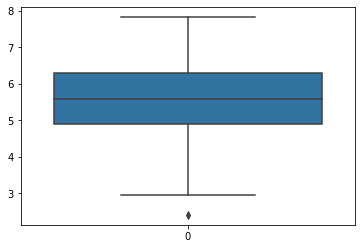

In [44]:
#анализ выбросов 
# построение boxplot 
sns.boxplot(data = happiness_2022.score)
plt.show()

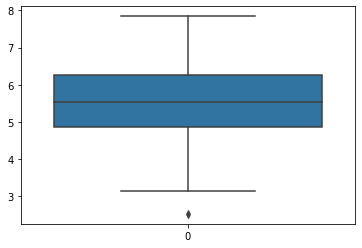

In [45]:
sns.boxplot(data = happiness_2021.score)
plt.show()

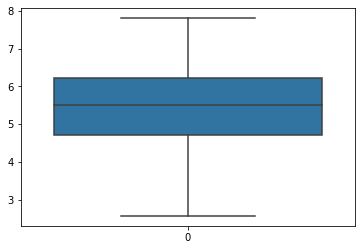

In [46]:
sns.boxplot(data = happiness_2020.score)
plt.show()

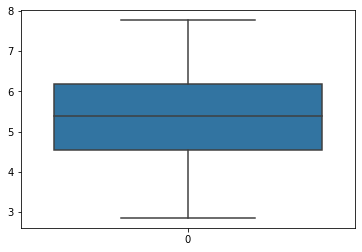

In [47]:
sns.boxplot(data = happiness_2019.score)
plt.show()

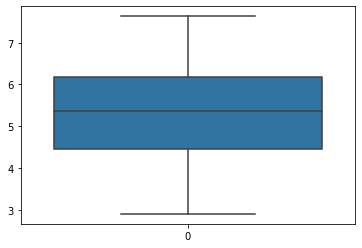

In [48]:
sns.boxplot(data = happiness_2018.score)
plt.show()

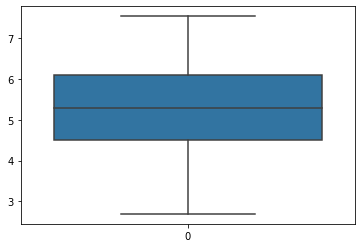

In [49]:
sns.boxplot(data = happiness_2017.score)
plt.show()

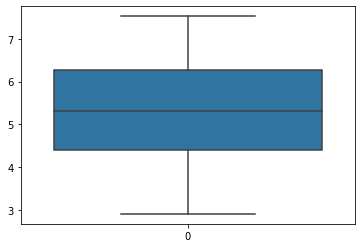

In [50]:
sns.boxplot(data = happiness_2016.score)
plt.show()

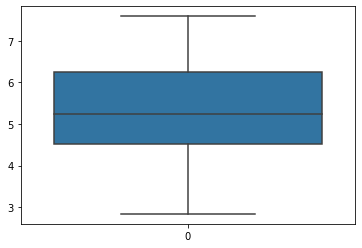

In [51]:
sns.boxplot(data = happiness_2015.score)
plt.show()

In [52]:
# поиск средней оценки за каждый год 
avg_score_2022 = np.mean(happiness_2022.score)
avg_score_2021 = np.mean(happiness_2021.score)
avg_score_2020 = np.mean(happiness_2020.score)
avg_score_2019 = np.mean(happiness_2019.score)
avg_score_2018 = np.mean(happiness_2018.score)
avg_score_2017 = np.mean(happiness_2017.score)
avg_score_2016 = np.mean(happiness_2016.score)
avg_score_2015 = np.mean(happiness_2015.score)

In [53]:
# вывод значений
print(avg_score_2022)
print(avg_score_2021)
print(avg_score_2020)
print(avg_score_2019)
print(avg_score_2018)
print(avg_score_2017)
print(avg_score_2016)
print(avg_score_2015)

5.55357534246575
5.532838926174494
5.47323986284967
5.407096153846153
5.375916666666668
5.354019355773926
5.382184713375795
5.3757341772151905


In [54]:
# создание списков для построение графика
avg_score = [avg_score_2015, avg_score_2016, avg_score_2017, avg_score_2018, avg_score_2019, avg_score_2020, avg_score_2021, avg_score_2022]
year = [2015, 2016, 2017, 2018, 2019, 2020, 2021, 2022]

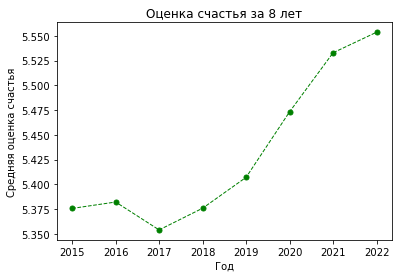

In [56]:
# построение графика изменения средней оценки счастья 
plt.plot(year, avg_score, linewidth=1, marker="o", markersize=5,  color='green',  linestyle='dashed')
ax = plt.subplot()
ax.set_xticks(year)
plt.title('Оценка счастья за 8 лет')
plt.xlabel('Год')
plt.ylabel('Средняя оценка счастья')
plt.show()

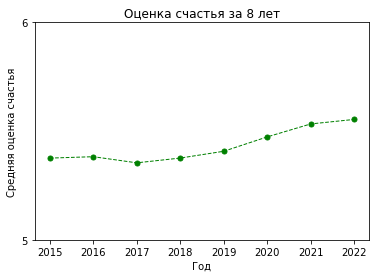

In [60]:
# построение графика изменения средней оценки счастья в уменьшенном масштабе на отрезке [5:6]
plt.plot(year, avg_score, linewidth=1, marker="o", markersize=5,  color='green',  linestyle='dashed')
ax = plt.subplot()
ax.set_xticks(year)
ax.set_yticks(range(5,7,1))
plt.title('Оценка счастья за 8 лет')
plt.xlabel('Год')
plt.ylabel('Средняя оценка счастья')
plt.show()

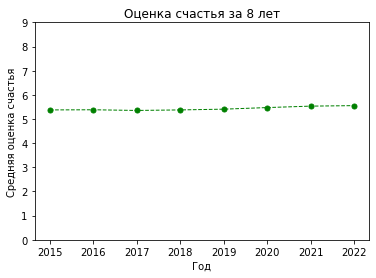

In [59]:
# построение графика изменения средней оценки счастья в уменьшенном масштабе
plt.plot(year, avg_score, linewidth=1, marker="o", markersize=5,  color='green',  linestyle='dashed')
ax = plt.subplot()
ax.set_xticks(year)
ax.set_yticks(range(0,10,1))
plt.title('Оценка счастья за 8 лет')
plt.xlabel('Год')
plt.ylabel('Средняя оценка счастья')
plt.show()

### Вывод

В период с 2015-2017 произошло падение оценки уровня счастья, с 2017-2022 оценка уровня счастья росла. Но в среднем за весь период оценка колеблется в промежутке от 5.3 до 5.6. Поэтому можно сделать вывод, что уровень счастья увеличивается незначительно.

### 3. Какой фактор оказывает наибольшее влияние на счастье в 2019 году? Какой фактор оказывает наименьшее влияние на счастье в 2019 году?

In [61]:
# получение описательной статистики 
happiness_2019.describe(include = 'all')

,rank,country,score,gdp,social_support,healthy,freedom,generosity,corruption
count,156.000000,156,156.000000,156.000000,156.000000,156.000000,156.000000,156.000000,156.000000
unique,NaN,156,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,Finland,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,78.500000,NaN,5.407096,0.905147,1.208814,0.725244,0.392571,0.184846,0.110603
std,45.177428,NaN,1.113120,0.398389,0.299191,0.242124,0.143289,0.095254,0.094538
min,1.000000,NaN,2.853000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,39.750000,NaN,4.544500,0.602750,1.055750,0.547750,0.308000,0.108750,0.047000
50%,78.500000,NaN,5.379500,0.960000,1.271500,0.789000,0.417000,0.177500,0.085500
75%,117.250000,NaN,6.184500,1.232500,1.452500,0.881750,0.507250,0.248250,0.141250


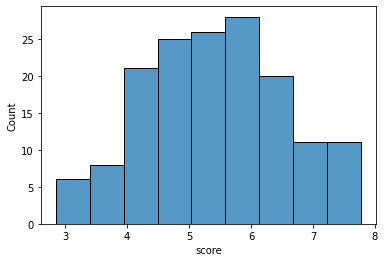

In [62]:
# анализ распределения данных путем построения гистограммы
sns.histplot(happiness_2019.score)
plt.show()


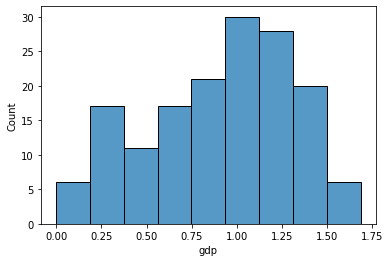

In [63]:
sns.histplot(happiness_2019.gdp)
plt.show()


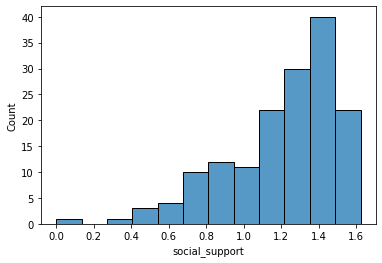

In [64]:
sns.histplot(happiness_2019.social_support)
plt.show()


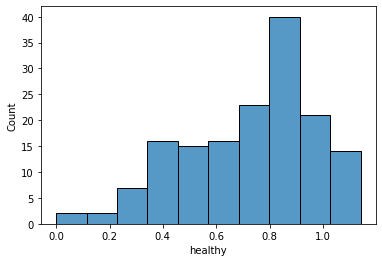

In [65]:
sns.histplot(happiness_2019.healthy)
plt.show()


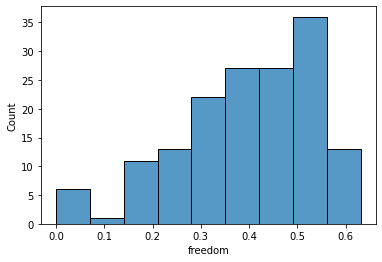

In [66]:
sns.histplot(happiness_2019.freedom)
plt.show()


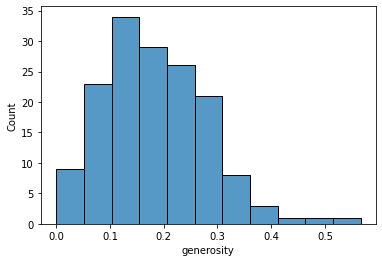

In [67]:
sns.histplot(happiness_2019.generosity)
plt.show()


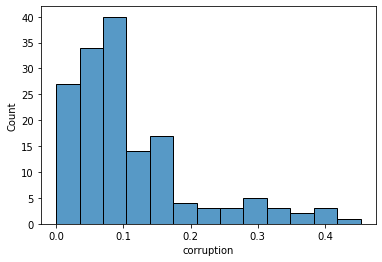

In [68]:
sns.histplot(happiness_2019.corruption)
plt.show()

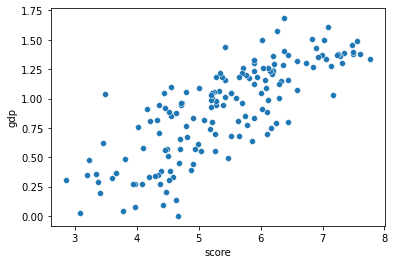

In [69]:
# построение диаграммы рассеяния
sns.scatterplot(x = happiness_2019.score, y = happiness_2019.gdp)
plt.show()

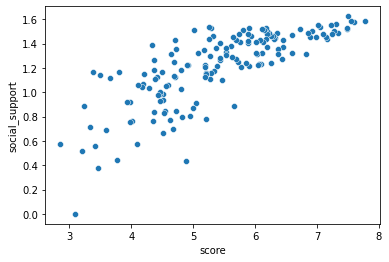

In [70]:
sns.scatterplot(x = happiness_2019.score, y = happiness_2019.social_support)
plt.show()

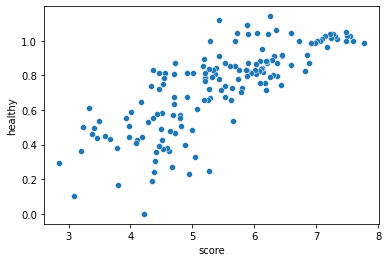

In [71]:
sns.scatterplot(x = happiness_2019.score, y = happiness_2019.healthy)
plt.show()

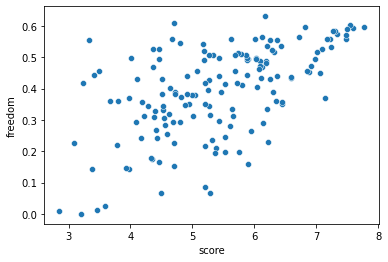

In [72]:
sns.scatterplot(x = happiness_2019.score, y = happiness_2019.freedom)
plt.show()

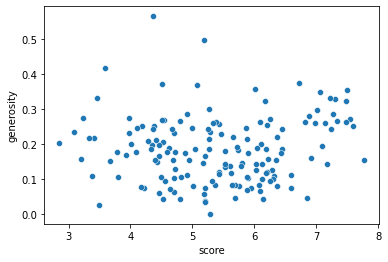

In [73]:
sns.scatterplot(x = happiness_2019.score, y = happiness_2019.generosity)
plt.show()

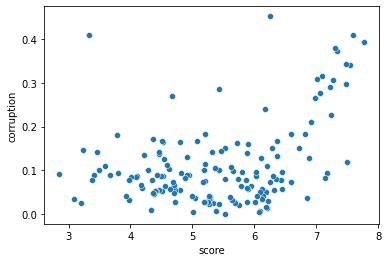

In [74]:
sns.scatterplot(x = happiness_2019.score, y = happiness_2019.corruption)
plt.show()

In [75]:
# Анализ завтсимости оценки счастья от других показателей с помощью Коэффициент Пирсона
corr_pearson = happiness_2019.corr(method ='pearson') 
corr_pearson

,rank,score,gdp,social_support,healthy,freedom,generosity,corruption
rank,1.000000,-0.989096,-0.801947,-0.767465,-0.787411,-0.546606,-0.047993,-0.351959
score,-0.989096,1.000000,0.793883,0.777058,0.779883,0.566742,0.075824,0.385613
gdp,-0.801947,0.793883,1.000000,0.754906,0.835462,0.379079,-0.079662,0.298920
social_support,-0.767465,0.777058,0.754906,1.000000,0.719009,0.447333,-0.048126,0.181899
healthy,-0.787411,0.779883,0.835462,0.719009,1.000000,0.390395,-0.029511,0.295283
freedom,-0.546606,0.566742,0.379079,0.447333,0.390395,1.000000,0.269742,0.438843
generosity,-0.047993,0.075824,-0.079662,-0.048126,-0.029511,0.269742,1.000000,0.326538
corruption,-0.351959,0.385613,0.298920,0.181899,0.295283,0.438843,0.326538,1.000000


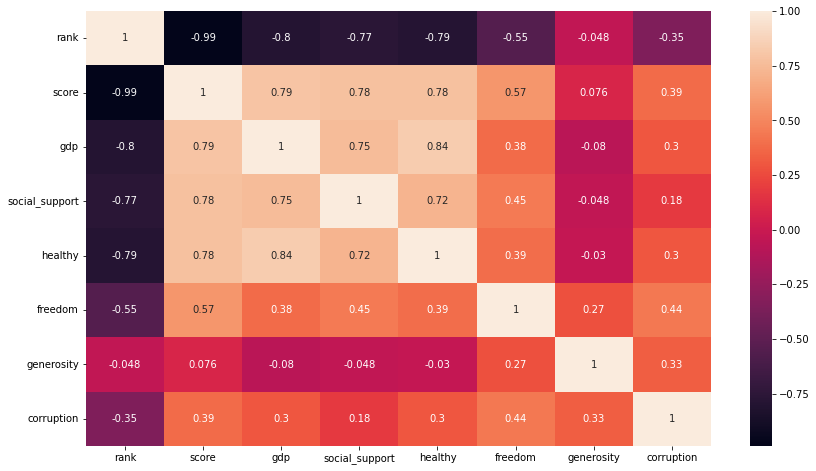

In [77]:
# построение тепловой карты
f, ax = plt.subplots(figsize=(14, 8))
sns.heatmap(corr_pearson, annot=True)
plt.show()

### Вывод 
На показатель оценки уровня счастья 'score' наибольшее влияние оказывает ВВП ('gdp'),  а наименьшее - показатель Щедрости ('generosity').